https://www.sciencedirect.com/science/article/pii/S0898122112001745#br000150

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
import math
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


# 1. Importing the dataset

## Data Sources:

The data is stored in data directory, containing 7 files as mentioned below:

 - amo.txt: This data series represents the mean SST of North Atlantic, i.e., within the latitude 0 °–70 °N, detrended to remove the influence of global warming. See: https://psl.noaa.gov/data/timeseries/AMO/
 - co2.txt: The long-time yearly time series of the concentration of co2
 - nao.txt: An index calculated from the measurements of air pressure at two locations: Ponta Delgada, Azores, and Stykkisholmur/Reykjavik in Iceland, see: https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii.table
 - spot_num.txt: The number of sun spots, see http://www.sidc.be/silso/datafiles
 - sstenso.txt: Temperature fluctuations expressed by the average SST anomaly of the region 20 °N–20 °S minus 90 °N–20 °N and 20 °S–90 °S, relative to the base period 1950–1979, see: https://www.cpc.ncep.noaa.gov/data/indices/sstoi.indices
 - temp.csv: global average temperature by year, see: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
 - volcano.csv: volcanic activities, see:

 - amo.txt: This data series represents the mean SST of North Atlantic, i.e., within the latitude 0 °–70 °N, detrended to remove the influence of global warming
 - co2.txt: The long-time yearly time series of the concentration of co2
 - nao.txt: An index calculated from the measurements of air pressure at two locations: Ponta Delgada, Azores, and Stykkisholmur/Reykjavik in Iceland
 - spot_num.txt: The number of sun spots
 - sstenso.txt: Temperature fluctuations expressed by the average SST anomaly of the region 20 °N–20 °S minus 90 °N–20 °N and 20 °S–90 °S, relative to the base period 1950–1979
 - temp.csv: global average temperature by year
 - volcano.csv: volcanic activities

## Read temperature data

<AxesSubplot:xlabel='date'>

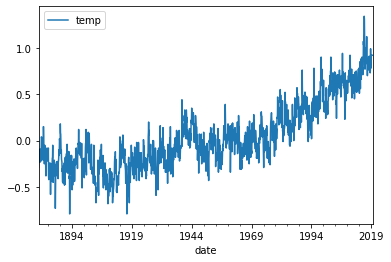

In [2]:
df_temp = pd.read_csv("data/global_surface_temperature_anomalies.csv")
df_temp['date'] = pd.to_datetime(df_temp['date'])
#df_temp.set_index('date', inplace=True)
df_temp["year"] = df_temp.date.dt.year
df_temp["month"] = df_temp.date.dt.month
df_temp['date'] = pd.to_datetime(df_temp['year'].astype(str) + '-' + df_temp['month'].astype(str))
df_temp.set_index('date', inplace=True)
df_temp = df_temp.rename(columns={"Avg_Anomaly_deg_C":"temp"})
df_temp = df_temp[["temp"]]
df_temp.dropna()
df_temp.plot()

## Read AMO data

<AxesSubplot:xlabel='date'>

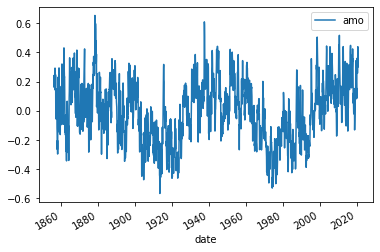

In [3]:
col_month = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split(" ")
df_amo = pd.read_csv("data/amo.txt",sep="   ",index_col=0, names = col_month) # 3 spaces
df_amo.reset_index(inplace=True)
df_amo.rename(columns={'index': 'year'}, inplace=True)
df_amo = df_amo.melt(id_vars='year', var_name='month')
df_amo['date'] = pd.to_datetime(df_amo['year'].astype(str) + '-' + df_amo['month'])
df_amo.set_index('date', inplace=True)
df_amo["value"] = pd.to_numeric(df_amo["value"],errors="coerce")
df_amo = df_amo.rename(columns={"value":"amo"})
df_amo = df_amo[["amo"]]
df_amo.dropna()
df_amo.sort_index()
df_amo.plot()

In [16]:
df_amo

,amo
date,
1856-01-01,0.237
1857-01-01,0.232
1858-01-01,-0.203
1859-01-01,-0.115
1860-01-01,0.132
...,...
2016-12-01,0.325
2017-12-01,0.354
2018-12-01,-0.070


## Read CO2 data

<AxesSubplot:xlabel='date'>

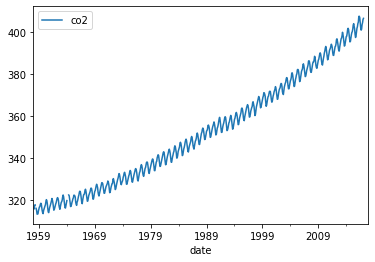

In [4]:
df_co2 = pd.read_csv("data/co2.csv")
df_co2["date"] = pd.to_datetime(df_co2["Year"].astype(str) + "-" + df_co2["Month"].astype(str))
df_co2.set_index("date", inplace=True)
df_co2 = df_co2.rename(columns={"Carbon Dioxide (ppm)":"co2"})
df_co2.co2 = pd.to_numeric(df_co2.co2)
df_co2 = df_co2[["co2"]]
df_co2.dropna()
df_co2.plot()

## Read NAO data

<AxesSubplot:xlabel='date'>

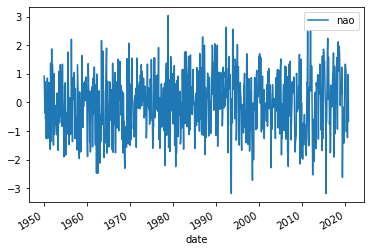

In [5]:
col_month = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split(" ")
df_nao = pd.read_csv("data/nao.txt",sep="  ",index_col=0, names = col_month) # 2 spaces
df_nao.reset_index(inplace=True)
df_nao.rename(columns={'index': 'year'}, inplace=True)
df_nao = df_nao.melt(id_vars='year', var_name='month')
df_nao['date'] = pd.to_datetime(df_nao['year'].astype(str) + '-' + df_nao['month'])
df_nao.set_index('date', inplace=True)
df_nao["value"] = pd.to_numeric(df_nao["value"],errors="coerce")
df_nao = df_nao.rename(columns={"value":"nao"})
df_nao = df_nao[["nao"]]
df_nao.dropna()
df_nao.sort_index()
df_nao.plot()

In [17]:
df_nao

,nao
date,
1950-01-01,0.92
1951-01-01,0.08
1952-01-01,0.93
1953-01-01,0.33
1954-01-01,0.37
...,...
2016-12-01,0.48
2017-12-01,0.88
2018-12-01,0.61


## Read Sun Spot Data

<AxesSubplot:xlabel='date'>

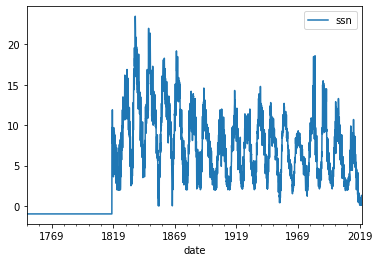

In [6]:
df_ssn = pd.read_csv("data/SN_m_tot_V2.0.csv",sep=";", index_col=2,names=["YEAR","MON","ir1","ssn","ir2","ir3"])
df_ssn["date"] = pd.to_datetime(df_ssn.YEAR.astype("str")+'-'+df_ssn.MON.astype(str))
df_ssn.set_index('date', inplace=True)
df_ssn.rename(columns={'SSN': 'ssn'}, inplace=True)
df_ssn["ssn"] = pd.to_numeric(df_ssn["ssn"],errors="coerce")
df_ssn = df_ssn[["ssn"]]
df_ssn.plot()

In [18]:
df_ssn

,ssn
date,
1749-01-01,-1.0
1749-02-01,-1.0
1749-03-01,-1.0
1749-04-01,-1.0
1749-05-01,-1.0
...,...
2020-06-01,0.6
2020-07-01,0.5
2020-08-01,1.3


## Read ENSO data

<AxesSubplot:xlabel='date'>

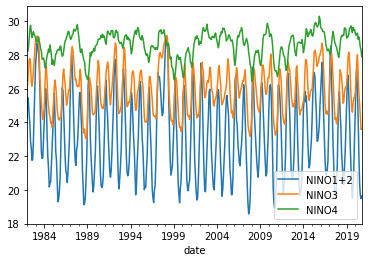

In [7]:
df_enso = pd.read_csv("data/sstenso.txt",sep=" ")

df_enso["date"] = pd.to_datetime(df_enso.YR.astype("str")+'-'+df_enso.MON.astype(str))
df_enso.set_index('date', inplace=True)
df_enso = df_enso[["NINO1+2","NINO3","NINO4"]]
df_enso[["NINO1+2","NINO3","NINO4"]] = df_enso[["NINO1+2","NINO3","NINO4"]].apply(pd.to_numeric,errors="coerce")
df_enso.plot()

In [19]:
df_enso

,NINO1+2,NINO3,NINO4
date,,,
1982-01-01,24.29,25.87,28.30
1982-02-01,25.49,26.38,28.21
1982-03-01,25.21,26.98,28.41
1982-04-01,24.50,27.68,28.92
1982-05-01,23.97,27.79,29.49
...,...,...,...
2020-06-01,22.13,25.75,29.07
2020-07-01,20.44,25.08,28.83
2020-08-01,19.69,24.42,28.47


## Read Volcanic data

In [29]:
df_vol_test = pd.read_csv("data/volcano.csv",sep=";")


In [30]:
df_vol_test

,Year,Month,Day,Associated Tsunami?,Associated Earthquake?,Name,Location,Country,Latitude,Longitude,...,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION
0,-4360,NaN,NaN,NaN,NaN,Macauley Island,Kermadec Is,New Zealand,"-30,2","-178,47",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4350,NaN,NaN,NaN,NaN,Kikai,Ryukyu Is,Japan,"30,78","130,28",...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0
2,-4050,NaN,NaN,NaN,NaN,Masaya,Nicaragua,Nicaragua,"11,984","-86,161",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-4000,NaN,NaN,NaN,NaN,Pago,New Britain-SW Pac,Papua New Guinea,"-5,58","150,52",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-3580,NaN,NaN,NaN,NaN,Taal,Luzon-Philippines,Philippines,"14,002","120,993",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,2014,2.0,1.0,NaN,NaN,Sinabung,Sumatra,Indonesia,"3,17","98,392",...,17.0,1.0,NaN,NaN,3.0,1.0,NaN,1.0,NaN,2.0
654,2014,2.0,13.0,NaN,NaN,Kelut,Java,Indonesia,"-7,93","112,308",...,7.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,4098.0,4.0
655,2014,9.0,27.0,NaN,NaN,On-take,Honshu-Japan,Japan,"35,9","137,48",...,55.0,2.0,NaN,NaN,70.0,2.0,NaN,NaN,NaN,NaN
656,2014,11.0,10.0,NaN,NaN,Kilauea,Hawaiian Is,United States,"19,425","-155,292",...,NaN,NaN,NaN,NaN,NaN,NaN,"14,5",3.0,1.0,1.0


<AxesSubplot:xlabel='date'>

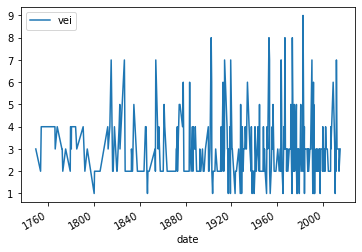

In [8]:
df_vol = pd.read_csv("data/volcano.csv",sep=";")
df_vol = df_vol[~df_vol["Month"].isna()]
df_vol = df_vol[df_vol["Year"]>=1749]

df_vol = df_vol[df_vol["Volcano Explosivity Index (VEI)"] > 0]
df_vol = df_vol.rename(columns={"Volcano Explosivity Index (VEI)":"vei"})
# df_vol["date"] = pd.to_datetime(df_vol.Year.astype(str)+'-'+df_vol.Month.astype(int).astype(str),errors="coerce")
df_vol_group = df_vol.groupby(["Year", "Month"])["vei"].sum().reset_index()
df_vol_group["date"] = pd.to_datetime(df_vol_group.Year.astype(str)+'-'+df_vol_group.Month.astype(int).astype(str))
df_vol_group.set_index("date",inplace=True)
df_vol_group = df_vol_group[["vei"]]
df_vol_group.plot()

In [21]:
df_vol_group

,vei
date,
1749-08-01,3.0
1753-10-01,2.0
1754-05-01,4.0
1755-10-01,4.0
1760-09-01,4.0
...,...
2011-06-01,7.0
2011-12-01,3.0
2013-08-01,3.0


### Merge Data

In [9]:
df = df_temp.join(df_amo,how="outer")
df = df.join(df_co2,how="outer")
df = df.join(df_enso,how="outer")
df = df.join(df_nao,how="outer")
df = df.join(df_vol_group,how="outer")
df = df.join(df_ssn,how="outer")
df


,temp,amo,co2,NINO1+2,NINO3,NINO4,nao,vei,ssn
date,,,,,,,,,
1749-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...
2020-08-01,NaN,0.438,NaN,19.69,24.42,28.47,0.12,NaN,1.3
2020-09-01,NaN,0.309,NaN,19.48,23.58,28.29,0.98,NaN,0.3
2020-10-01,NaN,0.301,NaN,19.63,23.62,27.89,-0.65,NaN,1.2


In [10]:
#reload_data = False

#data_store = pd.HDFStore('data/processed_data.h5')
#if reload_data:
#    data_store['df'] = df
#else:
#    df = data_store['df']
#data_store.close()


<AxesSubplot:>

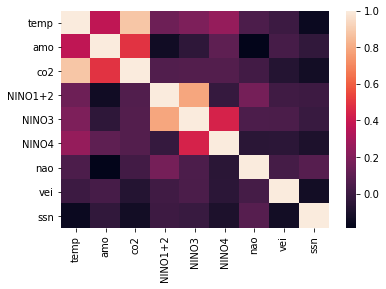

In [11]:
sns.heatmap(df.corr())

# Testing FBprophet

In [109]:
df

,temp,amo,co2,NINO1+2,NINO3,NINO4,nao,vei,ssn
date,,,,,,,,,
1749-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...
2020-08-01,NaN,0.438,NaN,19.69,24.42,28.47,0.12,NaN,1.3
2020-09-01,NaN,0.309,NaN,19.48,23.58,28.29,0.98,NaN,0.3
2020-10-01,NaN,0.301,NaN,19.63,23.62,27.89,-0.65,NaN,1.2


In [115]:
df_2020 = df.copy()
df_2020.reset_index(inplace=True)
df_2020 = df_2020.rename(columns={"date":"ds","temp":"y"})
df_2020 = df_2020[df_2020.ds >= "2017-02-01"]
df_2020 = df_2020[df_2020.ds <= "2019-12-01"]

In [35]:
df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy.rename(columns={"date":"ds","temp":"y"})
df_copy = df_copy[df_copy.ds >= "1984-01-01"]
df_copy["vei"] = df_copy["vei"].fillna(0)
# predict the last 10 years
df_copy.dropna(inplace=True)
df_train = df_copy.loc[df_copy["ds"]<"2010-01-01"]
df_test  = df_copy.loc[df_copy["ds"]>="2010-01-01"]


In [36]:
df_copy

,ds,y,amo,co2,NINO1+2,NINO3,NINO4,nao,vei,ssn
2820,1984-01-01,0.30,-0.106,343.70,24.18,24.82,27.64,1.66,0.0,6.5
2821,1984-02-01,0.17,-0.088,344.50,25.18,26.22,27.25,0.72,0.0,8.1
2822,1984-03-01,0.29,-0.125,345.28,26.00,27.12,27.21,-0.37,0.0,8.7
2823,1984-04-01,0.09,-0.157,347.07,25.16,27.34,27.70,-0.28,0.0,7.6
2824,1984-05-01,0.33,-0.166,347.43,23.23,26.46,27.95,0.54,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...
3213,2016-10-01,0.89,0.370,401.50,21.18,24.47,28.26,0.41,0.0,3.1
3214,2016-11-01,0.90,0.380,403.64,21.68,24.58,28.27,-0.16,0.0,2.6
3215,2016-12-01,0.83,0.325,404.55,23.35,24.78,28.35,0.48,0.0,2.4
3216,2017-01-01,0.98,0.215,406.07,25.75,25.61,28.18,0.48,0.0,2.5


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate(y_pred,y_true, name=""):
    x = np.arange(1,y_pred.shape[0] + 1)
    plt.plot(x, y_true)
    plt.plot(x, y_pred)
    plt.legend(["Y true","Y hat"])
    mae = mean_absolute_error(y_pred, y_true)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    plt.title("{} - MAE: {:0.6f}".format(name,mae))
    plt.show()
    errors = abs(y_pred - y_true)
    print('Model Performance')
    print('RMSE: {:0.6f}'.format(mean_squared_error(y_pred, y_true)))
    print('MAE: {:0.6f}'.format(mae))
    print('MAPE:  {:0.6f}'.format(mape))
    print("Pearson correlation: {:0.6f}".format(pearsonr(y_pred,y_true)[0]))
    print("Correlation coefficient: {:0.6f}".format(abs(1 - pearsonr(y_pred,y_true)[0])))

def evaluate_wo_graph(y_pred,y_true, name=""):
    x = np.arange(1,y_pred.shape[0] + 1)
    mae = mean_absolute_error(y_pred, y_true)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    errors = abs(y_pred - y_true)
    print('RMSE: {:0.6f}'.format(mean_squared_error(y_pred, y_true)))
    print('MAE: {:0.6f}'.format(mae))
    print('MAPE:  {:0.6f}'.format(mape))
    print("Pearson correlation: {:0.6f}".format(pearsonr(y_pred,y_true)[0]))
    print("Correlation coefficient: {:0.6f}".format(abs(1 - pearsonr(y_pred,y_true)[0])))

    

In [38]:
# import fbprophet
from fbprophet import Prophet
from dateutil.easter import easter

## Vanilla Prophet, using past temperatures to predict future temperature

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


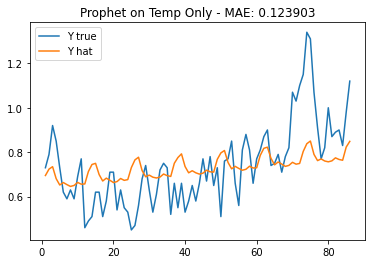

Model Performance
RMSE: 0.025749
MAE: 0.123903
MAPE:  nan
Pearson correlation: 0.587539
Correlation coefficient: 0.412461


In [15]:
# prepare data for vanilla prophet
df_train_vp = df_train[["ds","y"]]
df_test_vp = df_test[["ds","y"]]
m = Prophet()
m.fit(df_train_vp)
forecast = m.predict(df_test_vp.drop(columns="y"))
evaluate(forecast.yhat,df_test_vp.y,"Prophet on Temp Only")

## Multivariate Fbprophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


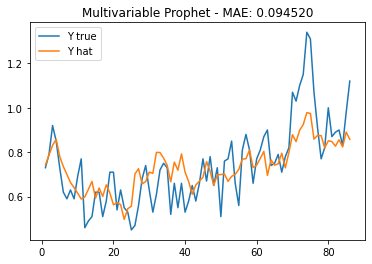

Model Performance
RMSE: 0.014732
MAE: 0.094520
MAPE:  nan
Pearson correlation: 0.791021
Correlation coefficient: 0.208979


In [16]:
# https://github.com/facebook/prophet/issues/792
m = Prophet(weekly_seasonality=True)
m.add_regressor("amo")
m.add_regressor("co2")
m.add_regressor("NINO1+2")
m.add_regressor("NINO3")
m.add_regressor("NINO4")
m.add_regressor("nao")
m.add_regressor("vei")
m.fit(df_train)
forecast = m.predict(df_test.drop(columns="y"))
evaluate(forecast.yhat,df_test.y,"Multivariable Prophet")

evaluate(forecast.yhat.rolling(12).mean().dropna(),df_test.y.rolling(12).mean().dropna(),"Multivariable Prophet")

m.plot_components(forecast)
plt.show()

# Test with normalized data

In [18]:
prepared = m.setup_dataframe(df_copy)


df_train = prepared.loc[prepared["ds"]<"2010-01-01"]
df_test  = prepared.loc[prepared["ds"]>="2010-01-01"]
future = df_test.drop(["y"], axis=1)
future = pd.DataFrame(future)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


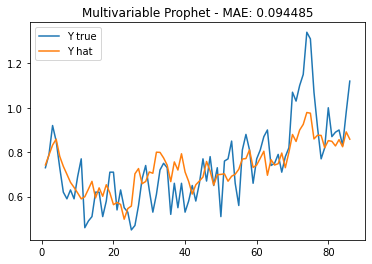

Model Performance
RMSE: 0.014720
MAE: 0.094485
MAPE:  nan
Pearson correlation: 0.790997
Correlation coefficient: 0.209003


In [25]:
# https://github.com/facebook/prophet/issues/792
m = Prophet(weekly_seasonality=True)
m.add_regressor("amo")
m.add_regressor("co2")
m.add_regressor("NINO1+2")
m.add_regressor("NINO3")
m.add_regressor("NINO4")
m.add_regressor("nao")
m.add_regressor("vei")
m.fit(df_train)
forecast = m.predict(df_test.drop(columns="y"))
evaluate(forecast.yhat,df_test.y,"Multivariable Prophet")

In [24]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'NINO1+2', 'NINO1+2_lower', 'NINO1+2_upper', 'NINO3', 'NINO3_lower',
       'NINO3_upper', 'NINO4', 'NINO4_lower', 'NINO4_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'amo', 'amo_lower',
       'amo_upper', 'co2', 'co2_lower', 'co2_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'nao', 'nao_lower', 'nao_upper',
       'vei', 'vei_lower', 'vei_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [27]:
feature_importance = forecast[['ds','trend','yhat','trend','NINO1+2',"NINO3","NINO4","additive_terms","amo","co2","extra_regressors_additive",
                              "nao","vei"]]

In [28]:
feature_importance

,ds,trend,yhat,trend,NINO1+2,NINO3,NINO4,additive_terms,amo,co2,extra_regressors_additive,nao,vei
0,2010-01-01,0.355378,0.742551,0.355378,0.011938,0.000527,0.052254,0.387172,0.012602,0.247618,0.322917,0.000182,-0.002204
1,2010-02-01,0.354801,0.787494,0.354801,0.020481,0.000852,0.029529,0.432693,0.071966,0.263331,0.386894,0.000315,0.000421
2,2010-03-01,0.354280,0.831942,0.354280,0.021565,0.001257,0.035626,0.477662,0.119285,0.273048,0.449599,0.000147,-0.001329
3,2010-04-01,0.353703,0.858525,0.353703,0.020277,0.001469,0.037843,0.504821,0.178649,0.287211,0.525992,0.000123,0.000421
4,2010-05-01,0.353145,0.781051,0.353145,0.008277,0.000753,0.025649,0.427906,0.193275,0.295895,0.523634,0.000240,-0.000454
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2016-10-01,0.309500,0.828094,0.309500,-0.012740,-0.000905,-0.017029,0.518595,0.158861,0.381490,0.510048,-0.000049,0.000421
82,2016-11-01,0.308923,0.856558,0.308923,-0.009350,-0.000832,-0.016475,0.547635,0.163163,0.403612,0.540576,0.000038,0.000421
83,2016-12-01,0.308364,0.824518,0.308364,0.001972,-0.000699,-0.012041,0.516154,0.139503,0.413019,0.542115,-0.000060,0.000421
84,2017-01-01,0.307787,0.891442,0.307787,0.018243,-0.000149,-0.021463,0.583655,0.092184,0.428732,0.517908,-0.000060,0.000421


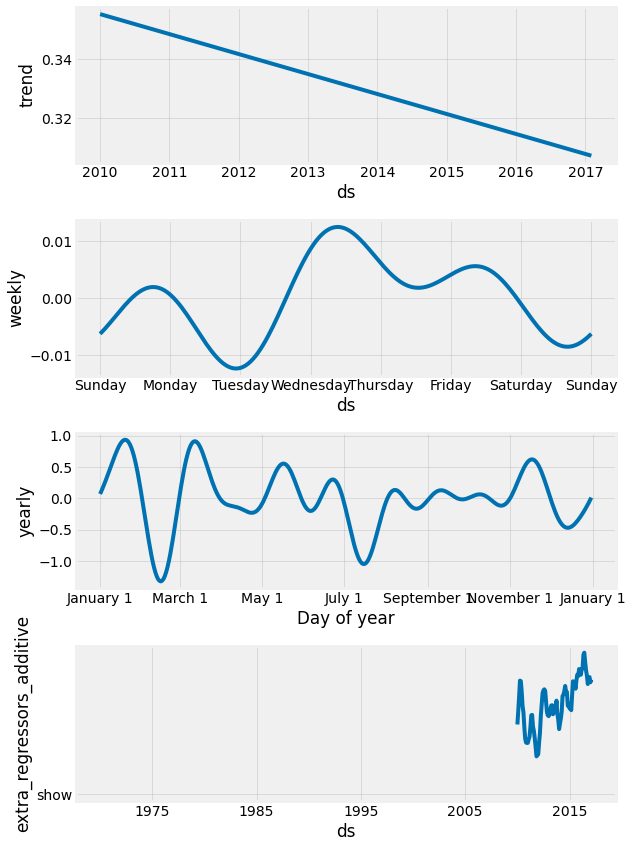

In [31]:
#plt.style.use('fivethirtyeight')
m.plot_components(forecast)
plt.plot("show")

## Tuning Prophet Hyperparameters

In [54]:
from sklearn.model_selection import ParameterGrid
from scipy.stats import pearsonr
import random
params_grid = {#'seasonality_mode':('multiplicative','additive'),
               #'changepoint_prior_scale':[0.1,0.5],
              'prior_amo':[True,False],
              'prior_co2':[True,False],
              'prior_nino1':[True,False],
              'prior_nino3':[True,False],
              'prior_nino4':[True,False],
              'prior_nao':[True,False],
              'prior_vei':[True,False],
              'prior_ssn':[True, False]}


grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)
prepared = m.setup_dataframe(df_copy)


df_train = prepared.loc[prepared["ds"]<"2010-01-01"]
df_test  = prepared.loc[prepared["ds"]>="2010-01-01"]
future = df_test.drop(["y"], axis=1)
future = pd.DataFrame(future)


Total Possible Models 256


In [55]:
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters','MAE',"corr"])
i = 1
for p in grid:
    #print(p)
    random.seed(0)
    m = Prophet(n_changepoints=100, changepoint_prior_scale=0.5)
    if p["prior_amo"]:
        m.add_regressor("amo")
    if p["prior_co2"]:
        m.add_regressor("co2")
    if p["prior_nino1"]:
        m.add_regressor("NINO1+2")
    if p["prior_nino3"]:
        m.add_regressor("NINO3")
    if p["prior_nino4"]:
        m.add_regressor("NINO4")
    if p["prior_nao"]:
        m.add_regressor("nao")
    if p["prior_vei"]:
        m.add_regressor("vei")
    if p["prior_ssn"]:
        m.add_regressor("ssn")

    # use the model to make a forecast
    m.fit(df_train)

    forecast = m.predict(future)
    y_true = df_test.y.values
    y_pred = forecast.yhat.values
    mae = mean_absolute_error(y_pred, y_true)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    corr = pearsonr(y_pred,y_true)[0]
    #print('RMSE: {:0.6f}'.format(mean_squared_error(y_pred, y_true)))
    #print('MAE: {:0.6f}'.format(mae))
    #print('MAPE:  {:0.6f}'.format(mape))
    #print("Pearson correlation: {:0.6f}".format(corr))
    #print("Correlation coefficient: {:0.6f}".format(abs(1 - corr)))
    model_parameters = model_parameters.append({'MAPE':mape,'MAE':mae,'Parameters':p, 'corr':corr},ignore_index=True)
    print("{}/256".format(i))
    i+=1


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


11/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


12/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


13/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


14/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


15/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


16/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


17/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


18/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


19/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


21/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


22/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


23/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


24/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


25/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


26/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


27/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


28/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


29/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


30/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


31/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


32/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


34/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


35/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


36/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


37/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


38/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


39/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


40/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


41/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


42/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


43/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


44/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


45/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


46/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


47/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


48/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


49/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


50/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


51/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


52/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


53/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


54/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


55/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


56/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


57/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


58/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


59/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


60/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


61/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


62/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


63/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


64/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


65/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


66/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


67/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


68/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


69/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


70/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


71/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


72/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


73/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


74/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


75/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


76/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


77/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


78/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


79/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


80/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


81/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


82/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


83/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


84/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


85/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


86/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


87/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


88/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


89/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


90/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


91/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


92/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


93/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


94/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


95/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


96/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


97/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


98/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


99/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


100/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


101/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


102/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


103/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


104/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


105/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


106/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


107/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


108/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


109/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


110/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


111/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


112/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


113/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


114/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


115/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


116/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


117/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


118/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


119/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


120/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


121/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


122/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


123/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


124/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


125/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


126/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


127/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


128/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


129/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


130/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


131/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


132/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


133/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


134/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


135/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


136/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


137/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


138/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


139/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


140/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


141/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


142/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


143/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


144/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


145/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


146/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


147/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


148/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


149/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


150/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


151/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


152/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


153/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


154/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


155/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


156/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


157/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


158/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


159/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


160/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


161/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


162/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


163/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


164/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


165/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


166/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


167/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


168/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


169/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


170/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


171/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


172/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


173/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


174/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


175/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


176/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


177/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


178/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


179/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


180/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


181/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


182/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


183/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


184/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


185/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


186/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


187/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


188/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


189/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


190/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


191/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


192/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


193/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


194/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


195/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


196/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


197/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


198/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


199/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


200/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


201/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


202/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


203/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


204/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


205/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


206/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


207/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


208/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


209/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


210/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


211/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


212/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


213/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


214/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


215/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


216/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


217/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


218/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


219/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


220/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


221/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


222/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


223/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


224/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


225/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


226/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


227/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


228/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


229/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


230/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


231/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


232/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


233/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


234/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


235/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


236/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


237/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


238/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


239/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


240/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


241/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


242/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


243/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


244/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


245/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


246/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


247/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


248/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


249/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


250/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


251/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


252/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


253/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


254/256


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


255/256
256/256


In [90]:
col_name = ['prior_amo', 'prior_co2', 'prior_nao', 'prior_nino1', 'prior_nino3', 'prior_nino4', 'prior_ssn', 'prior_vei']
row_list = []
for idx, i in model_parameters.sort_values(by=["MAE"]).iterrows():
    elem = i["Parameters"]
    elem["MAE"] = i["MAE"]
    elem["corr"] = i["corr"]
    row_list.append(elem)   
    #print(i[["MAE","corr"]])
permutation_result = pd.DataFrame(row_list)

In [94]:
permutation_result.head(10)

,prior_amo,prior_co2,prior_nao,prior_nino1,prior_nino3,prior_nino4,prior_ssn,prior_vei,MAE,corr
0,False,True,True,True,False,True,False,False,0.090354,0.790683
1,False,True,False,True,False,True,False,False,0.090443,0.788172
2,False,True,True,False,True,True,False,False,0.090634,0.794093
3,False,True,True,False,True,True,False,True,0.090769,0.788302
4,False,True,True,True,True,True,False,False,0.090859,0.783543
5,False,True,True,True,False,True,False,True,0.090909,0.781511
6,False,True,False,False,True,True,False,False,0.090944,0.793609
7,False,True,False,True,False,True,False,True,0.090968,0.782692
8,False,True,False,True,True,True,False,False,0.091153,0.783691
9,False,True,False,False,True,True,False,True,0.091301,0.788306


## Multivariate Multiplicative fbprophet

In [119]:
m = Prophet(n_changepoints=100, changepoint_prior_scale=0.5)
# fit the model
m.add_regressor("amo", prior_scale=0.01)
m.add_regressor("co2", prior_scale=0.5)
m.add_regressor("NINO1+2", prior_scale=0.1)
m.add_regressor("NINO3",prior_scale=0.1)
m.add_regressor("NINO4",prior_scale=0.5)
m.add_regressor("nao", prior_scale=0.1)
m.add_regressor("vei",prior_scale=0.1)
m.add_regressor("ssn", prior_scale=0.01)
m.fit(df_copy)

forecast = m.predict(df_2020.drop(columns="y"))
#evaluate(forecast.yhat,df_test.y,"Final Multivariate Prophet")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


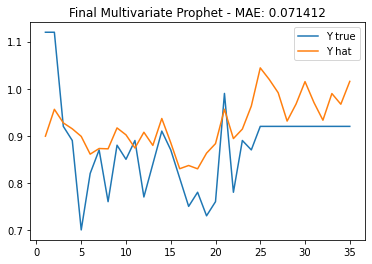

Model Performance
RMSE: 0.008098
MAE: 0.071412
MAPE:  nan
Pearson correlation: 0.541001
Correlation coefficient: 0.458999


In [133]:
evaluate(forecast.yhat,df_2020.loc[(df_2020["ds"]>= "2017-02-01") & (df_2020["ds"]<="2019-12-01")].y,"Final Multivariate Prophet")

In [134]:
df_2020.loc[(df_2020["ds"]>= "2017-02-01") & (df_2020["ds"]<="2019-12-01")]

,ds,y,amo,co2,NINO1+2,NINO3,NINO4,nao,vei,ssn
3217,2017-02-01,1.12,0.217,406.64,27.76,27.00,28.03,1.00,NaN,3.7
3218,2017-03-01,1.12,0.157,NaN,28.52,27.70,28.13,0.74,NaN,2.6
3219,2017-04-01,0.92,0.272,NaN,26.53,28.09,28.65,1.73,NaN,3.7
3220,2017-05-01,0.89,0.304,NaN,25.06,27.60,29.08,-1.91,NaN,1.8
3221,2017-06-01,0.70,0.298,NaN,22.98,26.73,29.39,0.05,NaN,1.4
3222,2017-07-01,0.82,0.292,NaN,21.54,25.85,29.21,1.26,NaN,2.6
3223,2017-08-01,0.87,0.299,NaN,20.19,24.82,28.87,-1.10,NaN,2.9
3224,2017-09-01,0.76,0.340,NaN,19.67,24.17,28.69,-0.61,NaN,4.1
3225,2017-10-01,0.88,0.423,NaN,19.45,24.28,28.55,0.19,NaN,1.0
3226,2017-11-01,0.85,0.341,NaN,20.44,23.92,28.46,-0.00,NaN,0.5


# Other models

In [21]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor

In [33]:
df_copy

,ds,y,amo,co2,NINO1+2,NINO3,NINO4,nao,vei,ssn
2820,1984-01-01,0.30,-0.106,343.70,24.18,24.82,27.64,1.66,0.0,6.5
2821,1984-02-01,0.17,-0.088,344.50,25.18,26.22,27.25,0.72,0.0,8.1
2822,1984-03-01,0.29,-0.125,345.28,26.00,27.12,27.21,-0.37,0.0,8.7
2823,1984-04-01,0.09,-0.157,347.07,25.16,27.34,27.70,-0.28,0.0,7.6
2824,1984-05-01,0.33,-0.166,347.43,23.23,26.46,27.95,0.54,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...
3213,2016-10-01,0.89,0.370,401.50,21.18,24.47,28.26,0.41,0.0,3.1
3214,2016-11-01,0.90,0.380,403.64,21.68,24.58,28.27,-0.16,0.0,2.6
3215,2016-12-01,0.83,0.325,404.55,23.35,24.78,28.35,0.48,0.0,2.4
3216,2017-01-01,0.98,0.215,406.07,25.75,25.61,28.18,0.48,0.0,2.5


In [22]:
from datetime import datetime as dt
df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy.rename(columns={"date":"ds","temp":"y"})
df_copy = df_copy[df_copy.ds >= "1984-01-01"]
df_copy["vei"] = df_copy["vei"].fillna(0)
# predict the last 10 years
df_copy.dropna(inplace=True)

df_copy["ds"] = pd.to_datetime(df_copy["ds"])
#df_copy["ds"] = df_copy["ds"].map(dt.toordinal)
df_train = df_copy.loc[df_copy["ds"]<"2010-01-01"]
df_test  = df_copy.loc[df_copy["ds"]>="2010-01-01"]

df_train["ds"] = df_train["ds"].map(dt.toordinal)
df_test["ds"] = df_test["ds"].map(dt.toordinal)

X_train = df_train.drop(['y'], axis=1)
y_train = df_train["y"]
X_test = df_test.drop(['y'], axis=1)
y_test = df_test["y"]

## Non-linear models
(code from https://machinelearningmastery.com/how-to-develop-machine-learning-models-for-multivariate-multi-step-air-pollution-time-series-forecasting/)

In [32]:
X_train

,ds,amo,co2,NINO1+2,NINO3,NINO4,nao,vei,ssn
2820,724276,-0.106,343.70,24.18,24.82,27.64,1.66,0.0,6.5
2821,724307,-0.088,344.50,25.18,26.22,27.25,0.72,0.0,8.1
2822,724336,-0.125,345.28,26.00,27.12,27.21,-0.37,0.0,8.7
2823,724367,-0.157,347.07,25.16,27.34,27.70,-0.28,0.0,7.6
2824,724397,-0.166,347.43,23.23,26.46,27.95,0.54,0.0,7.0
...,...,...,...,...,...,...,...,...,...
3127,733620,0.143,386.08,21.64,25.94,29.21,-0.19,0.0,2.0
3128,733651,0.048,384.65,20.82,25.66,29.28,1.51,0.0,2.2
3129,733681,0.155,384.33,20.96,25.73,29.65,-1.03,0.0,2.7
3130,733712,0.060,386.05,22.11,26.23,29.88,-0.02,0.0,3.2


In [23]:
from sklearn.base import clone
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

def get_models(models=dict()):
	# non-linear models
	models['knn'] = KNeighborsRegressor(n_neighbors=7)
	models['cart'] = DecisionTreeRegressor()
	models['extra'] = ExtraTreeRegressor()
	models['svmr'] = SVR()
	# # ensemble models
	n_trees = 100
	models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
	models['bag'] = BaggingRegressor(n_estimators=n_trees)
	models['rf'] = RandomForestRegressor(n_estimators=n_trees)
	models['et'] = ExtraTreesRegressor(n_estimators=n_trees)
	models['gbm'] = GradientBoostingRegressor(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

    

In [24]:
models = get_models()

Defined 9 models


In [31]:
for name,model in models.items():
    local_model = clone(model)
    # fit the model
    local_model.fit(X_train, y_train)
    # make prediction
    y_pred = local_model.predict(X_test)
    x = np.arange(1,87)
    print(name)
    evaluate(y_test,y_pred, name=name)


knn
Model Performance
RMSE: 0.037919
MAE: 0.145349
MAPE:  21.510399
Pearson correlation: nan
Correlation coefficient: nan
cart
Model Performance
RMSE: 0.066095
MAE: 0.206279
MAPE:  41.997089
Pearson correlation: 0.316997
Correlation coefficient: 0.683003
extra
Model Performance
RMSE: 0.045280
MAE: 0.170349
MAPE:  28.511365
Pearson correlation: 0.308562
Correlation coefficient: 0.691438
svmr
Model Performance
RMSE: 0.118910
MAE: 0.292240
MAPE:  65.251363
Pearson correlation: 0.636065
Correlation coefficient: 0.363935
ada
Model Performance
RMSE: 0.045996
MAE: 0.165335
MAPE:  27.318248
Pearson correlation: 0.501335
Correlation coefficient: 0.498665
bag
Model Performance
RMSE: 0.045298
MAE: 0.167302
MAPE:  27.849785
Pearson correlation: 0.662308
Correlation coefficient: 0.337692
rf
Model Performance
RMSE: 0.047254
MAE: 0.170771
MAPE:  28.675640
Pearson correlation: 0.626552
Correlation coefficient: 0.373448
et
Model Performance
RMSE: 0.045657
MAE: 0.164556
MAPE:  27.107790
Pearson correlat

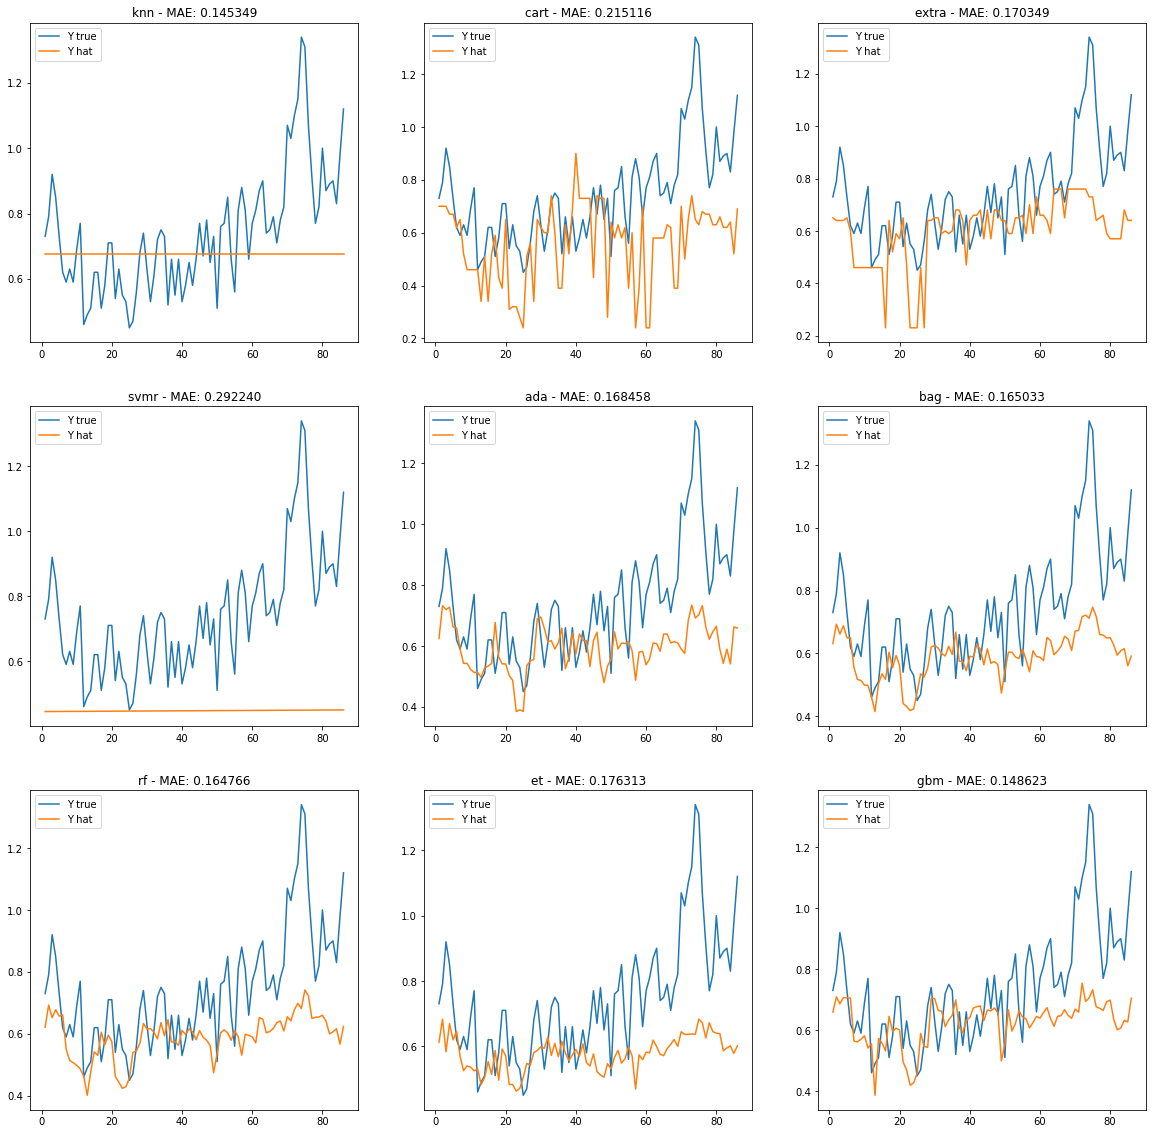

In [163]:
# create a subplot of 9 other models

fig = plt.figure(figsize=[20,20])
i = 0
for name,model in models.items():
    i += 1
    plt.subplot(3, 3, i)
    local_model = clone(model)
    # fit the model
    local_model.fit(X_train, y_train)
    # make prediction
    y_pred = local_model.predict(X_test)
    x = np.arange(1,87)
    plt.plot(x, y_test)
    plt.plot(x, y_pred)
    plt.legend(["Y true","Y hat"])
    mae = mean_absolute_error(y_pred, y_test)
    plt.title("{} - MAE: {:0.6f}".format(name,mae))
    # plt.tight_layout()



## VAR - Vector Auto Regressor

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [164]:
from statsmodels.tsa.vector_ar.var_model import VAR


In [165]:
# prepare data here
df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy.rename(columns={"date":"ds","temp":"y"})
df_copy = df_copy[df_copy.ds >= "1984-01-01"]
df_copy["vei"] = df_copy["vei"].fillna(0)
# predict the last 10 years
df_copy.dropna(inplace=True)
df_train = df_copy.loc[df_copy["ds"]<"2010-01-01"]
df_test  = df_copy.loc[df_copy["ds"]>="2010-01-01"]

df_train.set_index("ds",inplace=True)
df_test.set_index("ds",inplace=True)
X_train = df_train.drop(['y'], axis=1)
y_train = df_train["y"]
X_test = df_test.drop(['y'], axis=1)
y_test = df_test["y"]

In [166]:
model = VAR(endog=df_train)
#model_fit = model.fit()
#result = model_fit.forecast(model_fit.y, steps=len(df_test))
#print(yhat)


### Select the Order (P) of VAR model


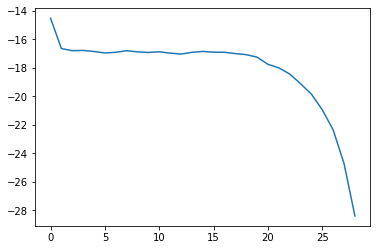

In [167]:
aic = []
for i in range(1,30):
    result = model.fit(i)
    aic.append(result.aic)
    #print('Lag Order =', i)
    #print('AIC : ', result.aic)
    #print('BIC : ', result.bic)
    #print('FPE : ', result.fpe)
    #print('HQIC: ', result.hqic, '\n')

plt.plot(aic)

In [168]:
x = model.select_order(maxlags=30)
x.summary()

,AIC,BIC,FPE,HQIC
0,-0.6070,-0.4908,0.5450,-0.5604
1,-14.40,-13.23,5.598e-07,-13.93
2,-16.54,-14.33*,6.558e-08,-15.66
3,-16.69,-13.43,5.690e-08,-15.38
4,-16.69,-12.39,5.701e-08,-14.97
5,-16.74,-11.39,5.541e-08,-14.59
6,-16.81,-10.42,5.231e-08,-14.25
7,-16.78,-9.337,5.568e-08,-13.79
8,-16.68,-8.200,6.325e-08,-13.28
9,-16.74,-7.210,6.265e-08,-12.92


## fit model

In [169]:
model_fit = model.fit(30)
#model_fit.summary()
result = model_fit.forecast(model_fit.y, steps=len(df_test))

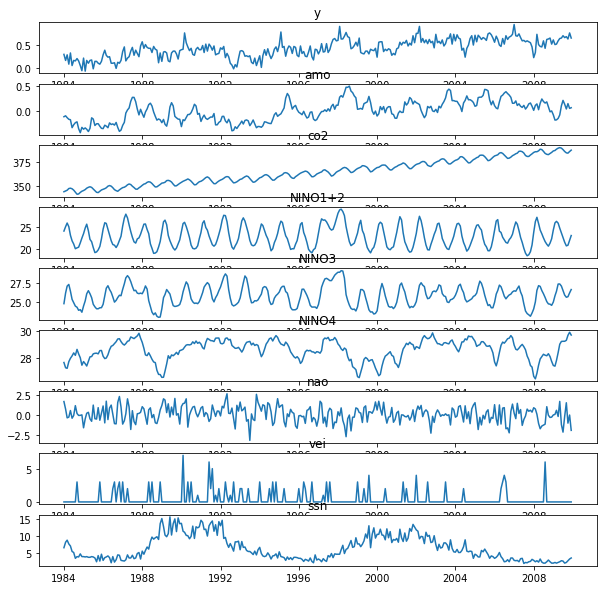

In [170]:
model_fit.plot()
plt.show()

# ARIMA with external regressor

In [33]:
from pmdarima.arima import auto_arima